In [8]:
import requests
import pandas as pd 

In [9]:
url = 'https://api.nasa.gov/'

In [10]:
API_KEY = 'ACLCYcq7P0TsbA8NfZTJlqjzl9ZGlOtI7y8JI6wY'

In [11]:
apod_url = "https://api.nasa.gov/planetary/apod"

response = requests.get(apod_url, params={"api_key": API_KEY})

if response.status_code == 200:
    apod_data = response.json()  # Parse the JSON response
    print(f"Title: {apod_data['title']}")
    print(f"Date: {apod_data['date']}")
    print(f"Description: {apod_data['explanation']}")
    print(f"Image URL: {apod_data['url']}")
else:
    print("Error:", response.status_code)

Title: Five Bright Comets from SOHO
Date: 2024-10-10
Description: Five bright comets are compared in these panels, recorded by a coronograph on board the long-lived, sun-staring SOHO spacecraft. Arranged chronologically all are recognizable by their tails streaming away from the Sun at the center of each field of view, where a direct view of the overwhelmingly bright Sun is blocked by the coronagraph's occulting disk. Each comet was memorable for earthbound skygazers, starting at top left with Comet McNaught, the 21st century's brightest comet (so far). C/2023 A3 Tsuchinshan-Atlas, approaching its perihelion with the active Sun at bottom center, has most recently grabbed the attention of comet watchers around the globe. By the end of October 2024, the blank 6th panel may be filled with bright sungrazer comet C/2024 S1 Atlas. ... or not.
Image URL: https://apod.nasa.gov/apod/image/2410/SohoKy3_1024.jpg


In [12]:
from IPython.display import Image, display

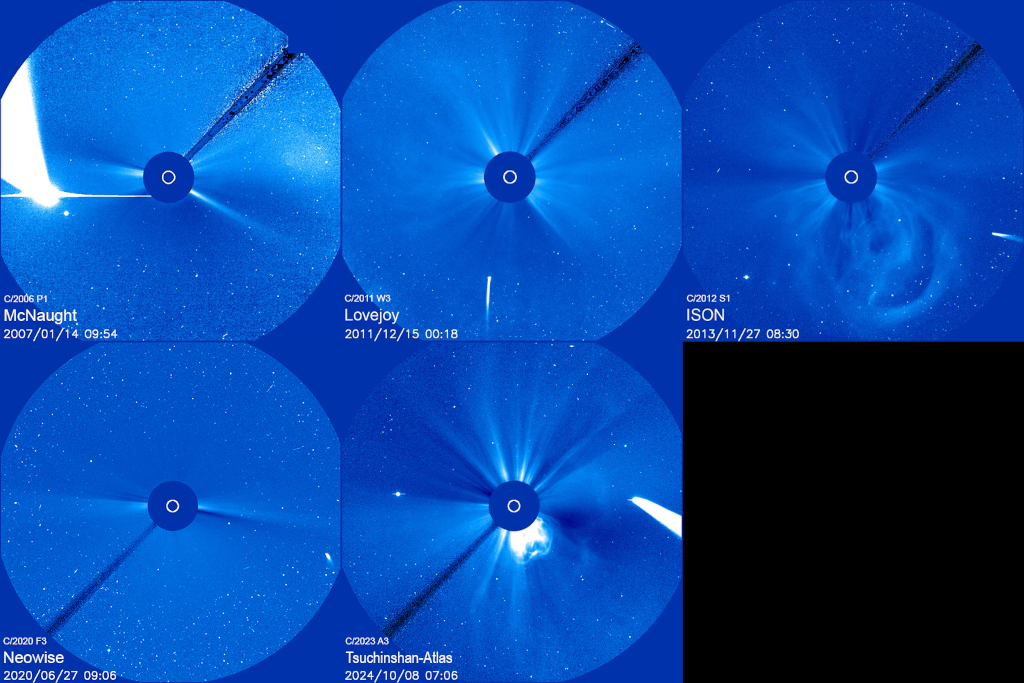

In [13]:
display(Image(apod_data['url']))

In [27]:
START_DATE = "2024-10-01"
END_DATE = "2024-10-07"
API_KEY =  'ACLCYcq7P0TsbA8NfZTJlqjzl9ZGlOtI7y8JI6wY'


neows_url = f"https://api.nasa.gov/neo/rest/v1/feed?start_date={START_DATE}&end_date={END_DATE}&api_key={API_KEY}"

response = requests.get(neows_url, params=params)

if response.status_code == 200:
    neows_data = response.json()  

    
    asteroid_list = []
    for date in neows_data['near_earth_objects']:
        for asteroid in neows_data['near_earth_objects'][date]:
            asteroid_data = {
                "Asteroid ID": asteroid['id'],
                "Asteroid name": asteroid['name'],
                "Minimal estimated diameter (km)": asteroid['estimated_diameter']['kilometers']['estimated_diameter_min'],
                "Absolute magnitude": asteroid['absolute_magnitude_h'],
                "Relative velocity (km/s)": asteroid['close_approach_data'][0]['relative_velocity']['kilometers_per_second']
            }
            asteroid_list.append(asteroid_data)
    
    
    df_asteroids = pd.DataFrame(asteroid_list)
    print(df_asteroids.head())
else:
    print("Error:", response.status_code)

  Asteroid ID       Asteroid name  Minimal estimated diameter (km)  \
0     2392704   392704 (2012 AE1)                         0.417402   
1     2524268  524268 (2001 TO48)                         0.274508   
2     3370290           (2007 EZ)                         0.291444   
3     3397567          (2007 XN3)                         0.201630   
4     3623952         (2013 AV60)                         0.468333   

   Absolute magnitude Relative velocity (km/s)  
0               19.02            12.3199522275  
1               19.93            26.6790860114  
2               19.80            18.8240572902  
3               20.60             6.5542562057  
4               18.77            21.3606002337  


In [29]:
df_asteroids.to_csv("asteroids_data.csv", index=False)